<a href="https://colab.research.google.com/github/Kagev/DataScience/blob/main/HW_2/DS_HW_2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

# DataScience - Homework 2 - part 3

Частина третя: Аналіз датасет c Kaggle.com

In [ ]:
#Прочитайте csv файл (використовуйте функцію read_csv)
import pandas as pd
import numpy as np
import pandas as pd

file_path = '/content/drive/MyDrive/Особисте/Навчання/GoIT/Colab Notebooks/bestsellers_with_categories.csv'
data = pd.read_csv(file_path)

In [ ]:
#Виведіть перші п'ять рядків (використовується функція head)
#Виведіть розміри датасету (використовуйте атрибут shape)
print(data.head)
print(data.shape)

<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

In [ ]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [ ]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

missing_data = data.isna().sum()
print(missing_data)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

unique_data = data['genre'].unique()

print(unique_data)

['Non Fiction' 'Fiction']


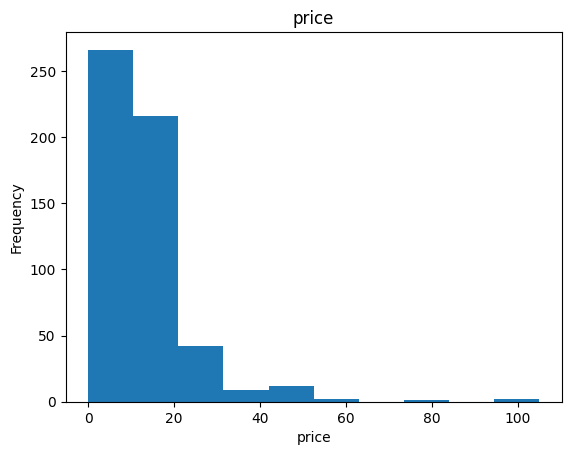

In [ ]:

# Побудова гістограми
data['price'].plot(kind='hist', title='price')
plt.xlabel('price')
plt.show()

In [ ]:
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print(f"Max Price: {max_price}")
print(f"Min Price: {min_price}")
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

Max Price: 105
Min Price: 0
Mean Price: 13.1
Median Price: 11.0


In [ ]:
#Найвищий рейтинг
highest_rating = data['user_rating'].max()
print(highest_rating)


4.9


In [ ]:
# Кількість книг з таким самим рейтінгом
count_highest_rating = data[data['user_rating'] == highest_rating].shape[0]
print(count_highest_rating)


In [ ]:
# книги з найбільшими відгуками
most_reviews = data['reviews'].max()
book_with_most_reviews = data[data['reviews'] == most_reviews]
print(book_with_most_reviews[['name', 'reviews']])


In [ ]:
# найдорожча книга
top_2015 = data[data['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]
print(most_expensive_2015[['name', 'price']])


                                                  name  price
277  Publication Manual of the American Psychologic...     46


In [ ]:
# кількість книг жанру Fiction
fiction_2010 = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')]
print(fiction_2010.shape[0])


20


In [ ]:
# книги з рейтінгом 4.9 2010 та 2011 роках
high_rating_books = data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))]
print(high_rating_books.shape[0])


1


In [ ]:
# сортування за ціною 2015
cheap_books_2015 = top_2015[top_2015['price'] < 8].sort_values(by='price')
print(cheap_books_2015.iloc[-1]['name'])


Old School (Diary of a Wimpy Kid #10)


In [ ]:
# максимальна та мінімальна ціна  для жанрів
genre_price_stats = data.groupby('genre')['price'].agg(['max', 'min'])
print(genre_price_stats)


             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [ ]:
#кількість книг для кожного автора
author_books_count = data.groupby('author')['name'].count().reset_index()
print(author_books_count.shape)
most_books_author = author_books_count[author_books_count['name'] == author_books_count['name'].max()]
print(most_books_author)


(248, 2)
          author  name
120  Jeff Kinney    12


In [ ]:
#середній рейтинг для кожного автора

author_avg_rating = data.groupby('author')['user_rating'].mean().reset_index()
min_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]
print(min_rating_author)


         author  user_rating
71  Donna Tartt          3.9


In [ ]:
# об'єднання  таблиць та сортування

author_data = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)
sorted_author_data = author_data.sort_values(by=['name', 'user_rating'])
print(sorted_author_data.iloc[0])


name           1.0
user_rating    4.0
Name: Muriel Barbery, dtype: float64


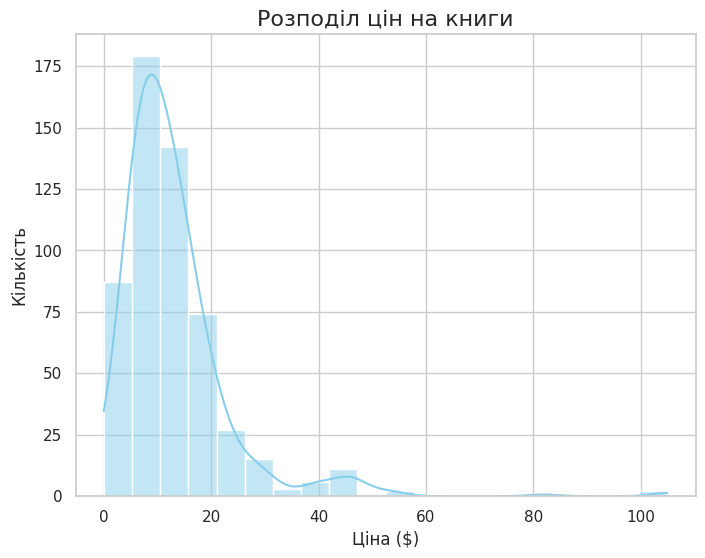

In [ ]:
# розподіл ціни
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Гістограма цін
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл цін на книги', fontsize=16)
plt.xlabel('Ціна ($)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.show()


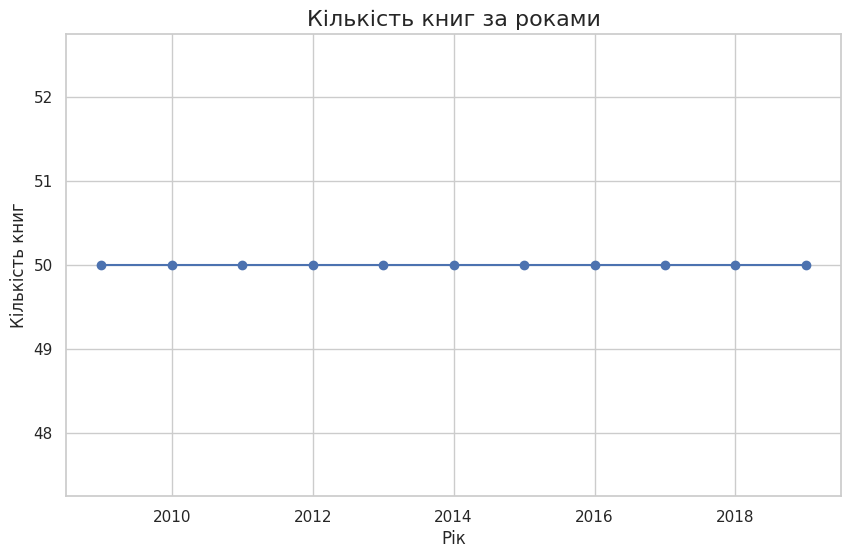

In [ ]:
books_per_year = data.groupby('year')['name'].count()

plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Кількість книг за роками', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Кількість книг', fontsize=12)
plt.grid(True)
plt.show()


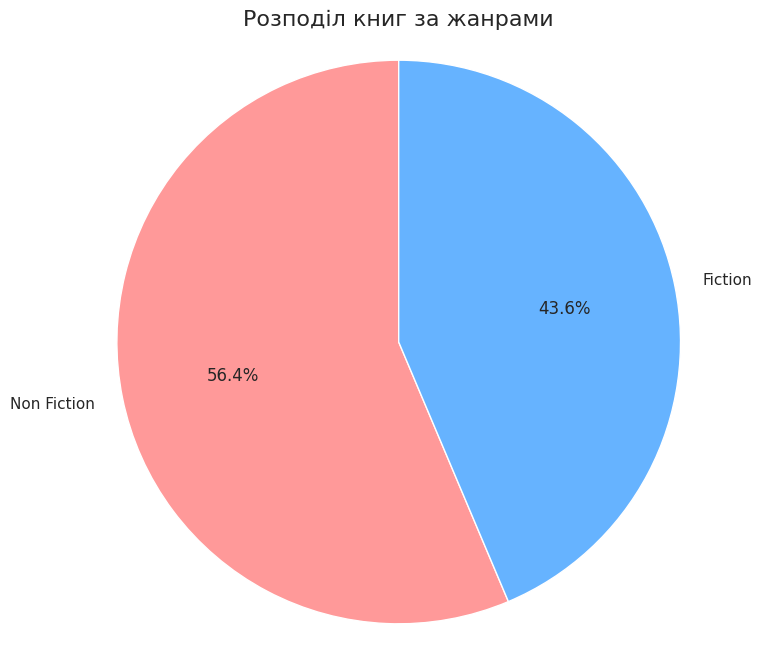

In [ ]:
genre_counts = data['genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Розподіл книг за жанрами', fontsize=16)
plt.axis('equal')
plt.show()
